In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

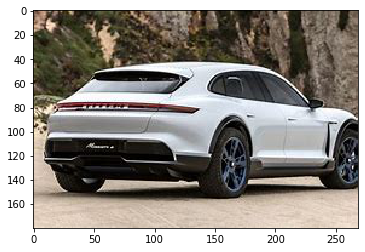

In [2]:
img= image.load_img("C:/Users/aarek/OneDrive/Desktop/Car&Flight/train/car/13.jpg")
plt.imshow(img)

In [3]:
cv2.imread("C:/Users/aarek/OneDrive/Desktop/Car&Flight/train/car/13.jpg")

array([[[158, 172, 195],
        [118, 133, 159],
        [ 50,  64,  93],
        ...,
        [ 86, 102, 115],
        [ 86, 102, 115],
        [ 84,  98, 110]],

       [[ 89, 103, 126],
        [ 91, 106, 132],
        [ 57,  73, 102],
        ...,
        [ 83,  99, 112],
        [ 81,  97, 110],
        [ 78,  91, 105]],

       [[ 38,  53,  79],
        [ 78,  92, 120],
        [ 80,  96, 125],
        ...,
        [ 75,  90, 106],
        [ 75,  91, 104],
        [ 74,  87, 101]],

       ...,

       [[189, 207, 224],
        [190, 208, 225],
        [198, 216, 233],
        ...,
        [203, 219, 236],
        [202, 218, 235],
        [201, 217, 234]],

       [[188, 206, 223],
        [194, 212, 229],
        [202, 220, 237],
        ...,
        [206, 222, 239],
        [206, 222, 239],
        [207, 223, 240]],

       [[190, 208, 225],
        [199, 217, 234],
        [208, 226, 243],
        ...,
        [207, 223, 240],
        [208, 224, 241],
        [211, 227, 244]]

In [4]:
cv2.imread("C:/Users/aarek/OneDrive/Desktop/Car&Flight/train/car/13.jpg").shape

(180, 269, 3)

In [5]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory("C:/Users/aarek/OneDrive/Desktop/Car&Flight/train/",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

validation_dataset=train.flow_from_directory("C:/Users/aarek/OneDrive/Desktop/Car&Flight/validation/",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 43 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'car': 0, 'flight': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(228, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             #optimizer=Adam(),
             metrics=['accuracy'])

In [11]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 5 steps
Epoch 1/10
3/3 [==============================] - 1s 489ms/step - loss: 10.2290 - accuracy: 0.4286 - val_loss: 1.3996 - val_accuracy: 0.5333
Epoch 2/10
3/3 [==============================] - 1s 268ms/step - loss: 1.3825 - accuracy: 0.4286 - val_loss: 0.7427 - val_accuracy: 0.4667
Epoch 3/10
3/3 [==============================] - 1s 278ms/step - loss: 0.8891 - accuracy: 0.3333 - val_loss: 1.5344 - val_accuracy: 0.5333
Epoch 4/10
3/3 [==============================] - 1s 265ms/step - loss: 1.2458 - accuracy: 0.6667 - val_loss: 0.6101 - val_accuracy: 0.5333
Epoch 5/10
3/3 [==============================] - 1s 240ms/step - loss: 0.3054 - accuracy: 0.7143 - val_loss: 0.5478 - val_accuracy: 0.5333
Epoch 6/10
3/3 [==============================] - 1s 265ms/step - loss: 0.2215 - accuracy: 1.0000 - val_loss: 0.4943 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 1s 248ms/step - los

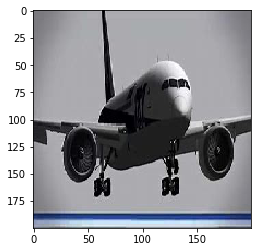

AIRPLANE


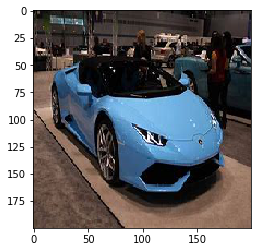

CAR


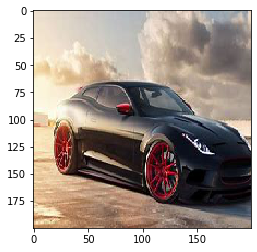

CAR


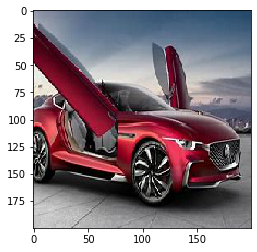

CAR


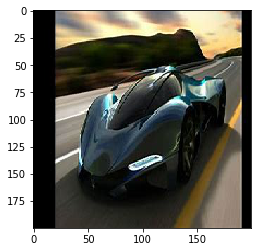

CAR


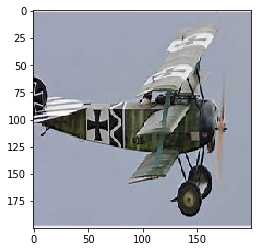

AIRPLANE


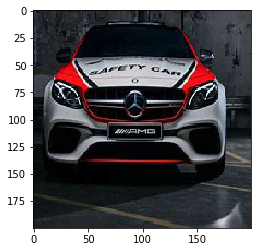

CAR


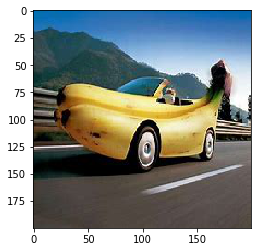

CAR


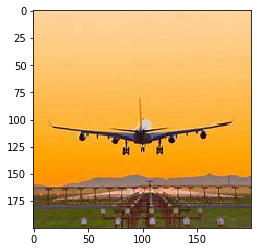

AIRPLANE


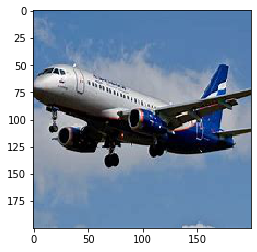

AIRPLANE


In [12]:
dir_path=('C:/Users/aarek/OneDrive/Desktop/Car&Flight/test/')

for i in os.listdir(dir_path):
    pic=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(pic)
    plt.show()
    
    X= image.img_to_array(pic)
    X= np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    
    if val==0:
        print("CAR")
    else:
        print("AIRPLANE")